Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
import math

In [3]:
data = pd.read_csv('taxi.csv')
data.head(5)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


видим что файл содержит общие данные о поступивших заказах, координатах водителя и пассажира и принятом решении взять заказ

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


Все имеющиеся признаки не содержат пропусков

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
offer_gk,100000.0,566218.928650,325935.980081,4.0,285555.250000,565671.500000,848719.750000,1.130355e+06
weekday_key,100000.0,3.159860,2.054222,0.0,1.000000,3.000000,5.000000,6.000000e+00
hour_key,100000.0,13.827790,7.306496,0.0,8.000000,16.000000,20.000000,2.300000e+01
driver_gk,100000.0,3446.376360,2038.738677,14.0,1421.000000,3506.500000,5242.000000,6.806000e+03
order_gk,100000.0,460867.012910,266064.989530,18.0,229178.500000,462420.000000,690894.000000,9.203440e+05
driver_latitude,100000.0,55.700824,2.135903,-1.0,55.708651,55.772904,55.960667,5.617410e+01
driver_longitude,100000.0,37.492292,1.454640,-1.0,37.413497,37.533664,37.624113,3.828055e+01
origin_order_latitude,100000.0,55.772440,0.665985,-1.0,55.708032,55.772561,55.962000,5.631112e+01
origin_order_longitude,100000.0,37.541637,0.467758,-1.0,37.407117,37.532537,37.624358,3.824361e+01
distance_km,100000.0,18.393518,41.129296,-1.0,-1.000000,10.411500,30.665250,5.234283e+03


data.groupby('order_gk').count()
data.groupby('offer_gk').count()

Проверка этих двух полей показала, что они уникальны и представляют собой номера закказа и вероятно договора и на результат принятия решения влиять не могут.

data.groupby('driver_gk').count()

поле идентификатор водителя. если планируется предсказывать поведение неконкретного водителя, то поле можно также удалить

In [6]:
data.drop(['driver_gk', 'offer_gk', 'order_gk'], axis='columns', inplace=True)
data.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [7]:
data.groupby('offer_class_group').count()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,ride_type_desc,driver_response
offer_class_group,,,,,,,,,,
Delivery,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290
Economy,48335,48335,48335,48335,48335,48335,48335,48335,48335,48335
Kids,588,588,588,588,588,588,588,588,588,588
Premium,1773,1773,1773,1773,1773,1773,1773,1773,1773,1773
Standard,47288,47288,47288,47288,47288,47288,47288,47288,47288,47288
Test,8,8,8,8,8,8,8,8,8,8
VIP,225,225,225,225,225,225,225,225,225,225
VIP+,29,29,29,29,29,29,29,29,29,29
XL,464,464,464,464,464,464,464,464,464,464


есть в классе заказа 8 тестовых записей, которык тиакже можно удалить

In [8]:
data = data.loc[data['offer_class_group'] != "Test"]
data.groupby('offer_class_group').count()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,ride_type_desc,driver_response
offer_class_group,,,,,,,,,,
Delivery,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290
Economy,48335,48335,48335,48335,48335,48335,48335,48335,48335,48335
Kids,588,588,588,588,588,588,588,588,588,588
Premium,1773,1773,1773,1773,1773,1773,1773,1773,1773,1773
Standard,47288,47288,47288,47288,47288,47288,47288,47288,47288,47288
VIP,225,225,225,225,225,225,225,225,225,225
VIP+,29,29,29,29,29,29,29,29,29,29
XL,464,464,464,464,464,464,464,464,464,464


In [9]:
data.groupby('ride_type_desc').count()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,driver_response
ride_type_desc,,,,,,,,,,
SMB,28,28,28,28,28,28,28,28,28,28
affiliate,224,224,224,224,224,224,224,224,224,224
business,8533,8533,8533,8533,8533,8533,8533,8533,8533,8533
private,91207,91207,91207,91207,91207,91207,91207,91207,91207,91207


заменим два категориальных признака на числовые

In [10]:
level_map = {'SMB':1 ,  'affiliate':2,  'business':3,  'private':4}
data['ride_type_desc'] = data['ride_type_desc'].map(level_map)

In [11]:
level_map = {'Delivery':1 ,  'Economy':2,  'Kids':3,  'Premium':4,'Standard':5 ,  'VIP':6,  'VIP+':7,  'XL':8}
data['offer_class_group'] = data['offer_class_group'].map(level_map)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 11 columns):
weekday_key               99992 non-null int64
hour_key                  99992 non-null int64
driver_latitude           99992 non-null float64
driver_longitude          99992 non-null float64
origin_order_latitude     99992 non-null float64
origin_order_longitude    99992 non-null float64
distance_km               99992 non-null float64
duration_min              99992 non-null float64
offer_class_group         99992 non-null int64
ride_type_desc            99992 non-null int64
driver_response           99992 non-null int64
dtypes: float64(6), int64(5)
memory usage: 9.2 MB


In [13]:
data.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,2,4,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,5,4,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,2,4,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,2,4,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,2,4,1


data.groupby('duration_min').count()
data.groupby('distance_km').count()

Проверка этих двух показателей выявила порядка 26 тыс наблюдений с ошибочным значением "-1". Пренебречть таким количеством записей неразумно, поэтому я бы попробовал заменить их на вычисленные значения.
Более того, поскольку значения дистанции до клиента и времени пдачи примерно коррелируют, я бы оставил только дистанцию как легко вычисляемую

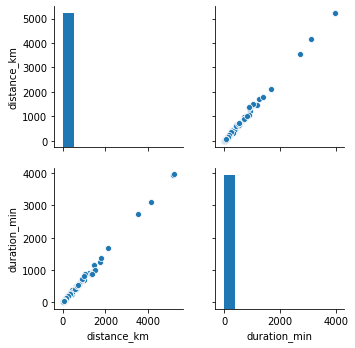

In [14]:
cols = ['distance_km', 'duration_min']
sns_plot = sns.pairplot(data[cols])


In [15]:
data.drop(['duration_min'], axis='columns', inplace=True)
data.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,2,4,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,5,4,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,2,4,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,2,4,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,2,4,1


координаты оставлены временно для вычисления расстояний

In [16]:
data['kat1']=np.cos(data['driver_latitude'])*2*3.14*6360000/360*abs(data['driver_longitude']-data['origin_order_longitude'])

In [17]:
data['kat2']=abs(data['driver_latitude']-data['origin_order_latitude'])*2*3.14*6360000/360

In [18]:
data['new_dist']=np.sqrt(data['kat1']*data['kat1']+data['kat2']*data['kat2'])

In [19]:
data.head(10)

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group,ride_type_desc,driver_response,kat1,kat2,new_dist
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,2,4,0,1690.794121,474.297000,1756.058770
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,5,4,1,3971.756711,1551.811027,4264.149251
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,2,4,0,525.738477,94.193720,534.109916
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,2,4,1,723.150161,272.152173,772.666138
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,2,4,1,473.390785,996.412013,1103.148102
5,6,15,55.818963,37.361033,55.814827,37.354074,6.747,2,4,0,575.484637,458.875413,736.036149
6,2,11,55.753508,37.663742,55.757251,37.659064,-1.000,5,3,1,363.394553,415.273373,551.822051
7,5,20,55.839318,37.248862,55.839134,37.304101,1.517,2,4,0,4650.280229,20.414187,4650.325037
8,5,20,55.818748,37.338240,55.835764,37.294710,6.222,2,4,0,3599.084434,1887.868480,4064.167339
9,6,7,55.839155,37.251947,55.833198,37.312197,10.410,2,4,0,5071.420150,660.909293,5114.303807


это была попытка вычислить расстояния по прямой. полагаю поэтому такие различия от реальных расстояний по карте. а может и ошибся где-то. пока не разобрался
http://www.bolshoyvopros.ru/questions/417153-kak-opredelit-rasstojanie-mezhdu-dvumja-tochkami-zadannymi-koordinatami-gps.html

In [20]:
data.loc[data['distance_km']==-1.,'distance_km']=data['new_dist']

In [21]:
data.head(10)

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group,ride_type_desc,driver_response,kat1,kat2,new_dist
0,5,20,55.818842,37.334562,55.814567,37.355010,1756.058770,2,4,0,1690.794121,474.297000,1756.058770
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802000,5,4,1,3971.756711,1551.811027,4264.149251
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747000,2,4,0,525.738477,94.193720,534.109916
3,2,6,55.745922,37.421748,55.743469,37.431130,772.666138,2,4,1,723.150161,272.152173,772.666138
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383000,2,4,1,473.390785,996.412013,1103.148102
5,6,15,55.818963,37.361033,55.814827,37.354074,6.747000,2,4,0,575.484637,458.875413,736.036149
6,2,11,55.753508,37.663742,55.757251,37.659064,551.822051,5,3,1,363.394553,415.273373,551.822051
7,5,20,55.839318,37.248862,55.839134,37.304101,1.517000,2,4,0,4650.280229,20.414187,4650.325037
8,5,20,55.818748,37.338240,55.835764,37.294710,6.222000,2,4,0,3599.084434,1887.868480,4064.167339
9,6,7,55.839155,37.251947,55.833198,37.312197,10.410000,2,4,0,5071.420150,660.909293,5114.303807


удаляем ненужные столбцы с координатами и прочее

In [22]:
data.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude', 'kat1', 'kat2', 'new_dist'], axis='columns', inplace=True)
data.head()

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response
0,5,20,1756.058770,2,4,0
1,5,14,18.802000,5,4,1
2,6,14,6.747000,2,4,0
3,2,6,772.666138,2,4,1
4,4,16,12.383000,2,4,1


data = data.loc[data['offer_class_group'] != "Test"]
data.groupby('offer_class_group').count()

In [23]:
data.loc[data['distance_km'] < 0.1].count()


weekday_key          226
hour_key             226
distance_km          226
offer_class_group    226
ride_type_desc       226
driver_response      226
dtype: int64

In [24]:
data = data.loc[data['distance_km']> 0.1]

In [25]:
data.loc[data['distance_km'] >=5000].count()

weekday_key          399
hour_key             399
distance_km          399
offer_class_group    399
ride_type_desc       399
driver_response      399
dtype: int64

In [26]:
data = data.loc[data['distance_km']< 5000]

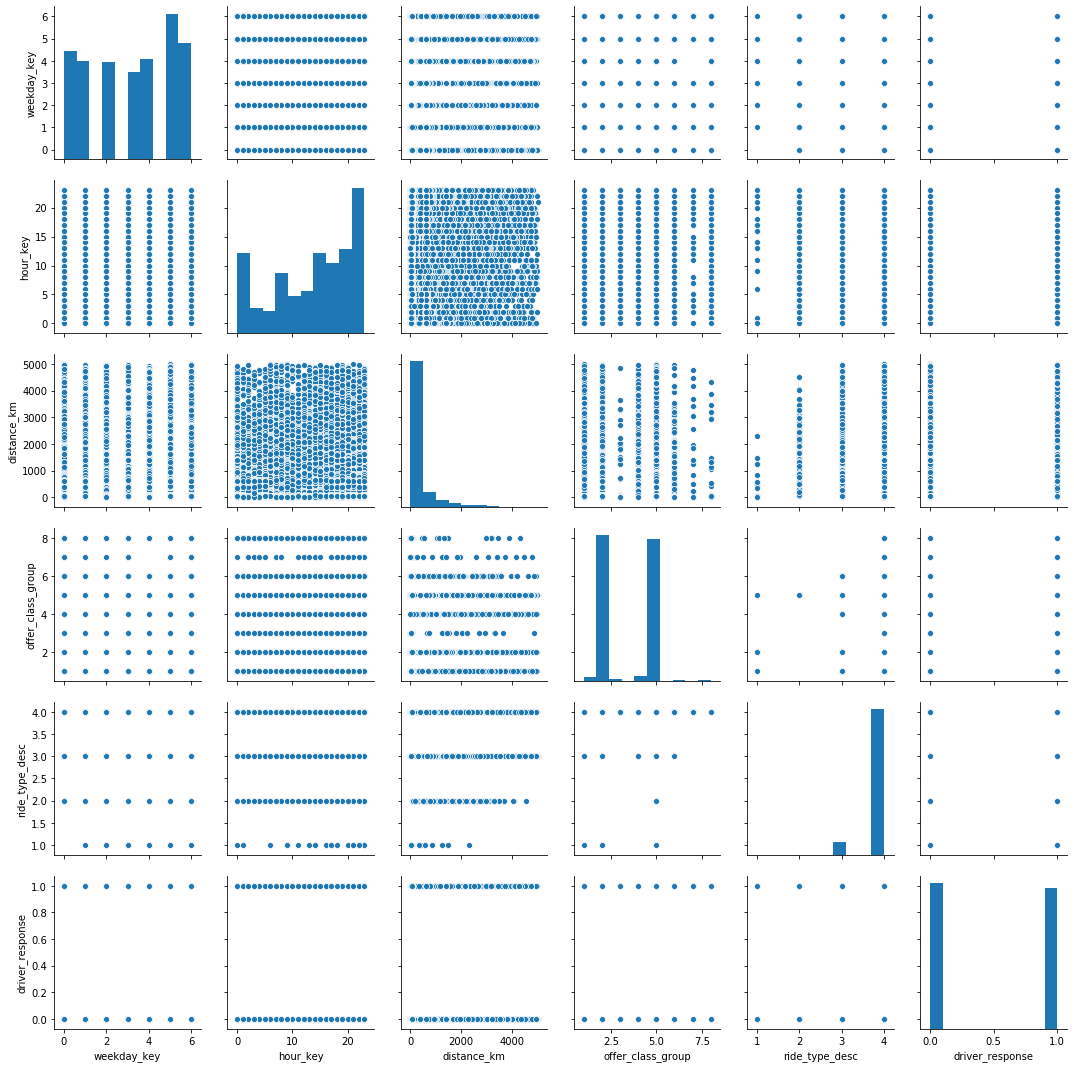

In [27]:
sns.pairplot(data)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99367 entries, 0 to 99999
Data columns (total 6 columns):
weekday_key          99367 non-null int64
hour_key             99367 non-null int64
distance_km          99367 non-null float64
offer_class_group    99367 non-null int64
ride_type_desc       99367 non-null int64
driver_response      99367 non-null int64
dtypes: float64(1), int64(5)
memory usage: 7.8 MB


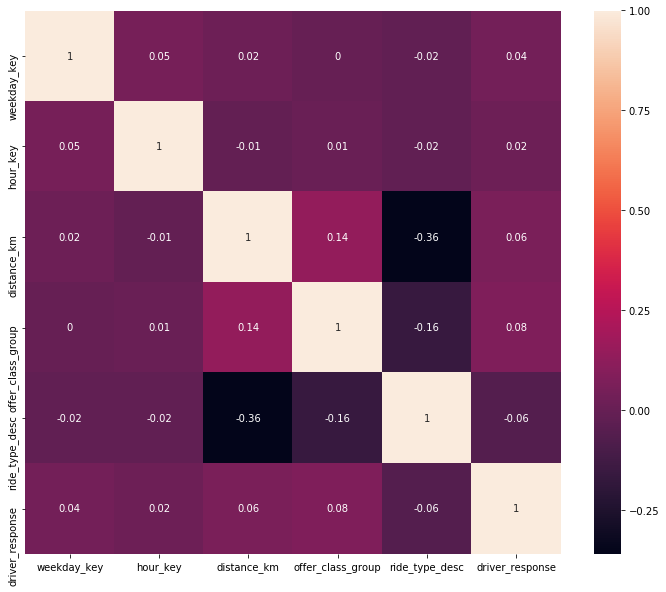

In [29]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [30]:
X_columns = data.columns[:-1]
y_column = data.columns[-1]

X_columns, y_column

(Index(['weekday_key', 'hour_key', 'distance_km', 'offer_class_group',
        'ride_type_desc'],
       dtype='object'), 'driver_response')

In [31]:
X = data[X_columns]
y = data[y_column]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.012717282232527993
RMSE: 	 0.49676189932448
MAE: 	 0.493935923033668


Получены неудовлетворительные результаты. Технически подготовка вроде как выполнена норм, но дальше не понимаю куда двигаться. К сожалению не нашел в лекциях алгоритма RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=4)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6470765824695582

In [38]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6646372144510415

In [42]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6648887994364496

In [41]:
rf = RandomForestClassifier(n_estimators=4)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9104826840099128

In [43]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6633792895240012

In [44]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6641340444802254

лцчшего результата удалось добиться на 500 итерациях, хотя и 50 не сильно отличаются